In [1]:
import pandas as pd
import os, math, json
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from IPython.display import IFrame

In [2]:
# Vulnerability index
df_vul = pd.read_csv("composite-vulnerability.csv")

In [3]:
df_vul[:10]

,Region,Category,Composite Vulnerability Index,Drought index,Health System Vulnerability Index,Mean Nutrient Adequacy Ratio Index,Per Capita Food Consumption Index,Vulnerability to Climate Change Index
0,Ashanti,0,0.3085,0.41,0.2188,0.3577,0.7515,0.4090
1,Brong Ahafo,1,0.3876,0.63,0.2180,0.2121,0.5116,0.6320
2,Central,2,0.1516,0.03,0.2310,0.0324,0.6838,0.0266
3,Eastern,3,0.3149,0.44,0.4990,0.0000,0.6806,0.4412
4,Greater Accra,4,0.1319,0.32,0.0000,0.2092,1.0000,0.3183
5,Nothern,5,0.8634,1.00,1.0000,0.6756,0.2220,1.0000
6,Upper East,6,0.6526,0.59,0.1692,0.9297,0.0805,0.5920
7,Upper West,7,0.9388,0.97,0.7884,1.0000,0.0000,0.9667
8,Volta,8,0.4447,0.59,0.4706,0.0853,0.3692,0.5922
9,Western,9,0.2532,0.00,0.2203,0.3370,0.5444,0.0000


In [4]:
# nutrition adeqacy
df_nut = pd.read_csv("Nutrient adequacy data.csv")

In [5]:
df_nut[:10]

,Category,Average consumption adequacy of Kilocalories (kcal) (NAME_1),VitaminC,Zinc,VitaminB6,VitaminB12,VitaminA,Thiamin,Riboflavin,Proteins,Niacin,Kcal,Iron,Follate,Calcium
0,0,Ashanti,89.50,40.10,50.19,72.27,72.60,34.76,44.24,78.76,54.35,46.39,50.32,48.61,77.39
1,1,Brong Ahafo,92.36,46.40,58.70,63.49,66.58,41.70,44.45,80.84,57.94,52.76,57.41,54.96,76.61
2,2,Central,90.29,48.08,51.20,86.73,85.80,39.59,50.12,86.01,60.96,50.12,55.05,49.51,83.57
3,3,Eastern,92.15,44.27,55.06,83.20,83.85,41.23,50.89,85.36,58.40,51.70,59.76,52.30,86.57
4,4,Greater Accra,88.14,40.36,52.33,83.82,79.45,36.84,48.27,83.61,56.34,45.28,49.61,49.59,81.24
5,5,Northern,69.47,42.11,46.74,41.39,46.56,46.50,39.55,77.92,55.05,50.42,54.44,54.90,58.64
6,6,Upper East,54.32,41.10,39.80,20.58,40.31,45.81,40.14,74.87,49.15,45.19,60.77,51.64,59.46
7,7,Upper West,64.37,38.27,41.56,24.95,32.91,46.75,35.24,70.47,51.46,49.47,52.15,52.80,45.96
8,8,Volta,88.85,44.17,53.13,74.30,78.62,48.15,45.86,82.37,58.84,54.54,58.73,58.82,78.02
9,9,Western,88.03,42.39,50.74,63.20,76.32,35.37,49.56,80.42,56.17,47.78,53.55,42.91,77.96


In [6]:
# Merge on 'Category' (keeps both datasets aligned by region)
df = pd.merge(df_vul, df_nut, on="Category", how="inner")

In [7]:
df

,Region,Category,Composite Vulnerability Index,Drought index,Health System Vulnerability Index,Mean Nutrient Adequacy Ratio Index,Per Capita Food Consumption Index,Vulnerability to Climate Change Index,Average consumption adequacy of Kilocalories (kcal) (NAME_1),VitaminC,...,VitaminB12,VitaminA,Thiamin,Riboflavin,Proteins,Niacin,Kcal,Iron,Follate,Calcium
0,Ashanti,0,0.3085,0.41,0.2188,0.3577,0.7515,0.4090,Ashanti,89.50,...,72.27,72.60,34.76,44.24,78.76,54.35,46.39,50.32,48.61,77.39
1,Brong Ahafo,1,0.3876,0.63,0.2180,0.2121,0.5116,0.6320,Brong Ahafo,92.36,...,63.49,66.58,41.70,44.45,80.84,57.94,52.76,57.41,54.96,76.61
2,Central,2,0.1516,0.03,0.2310,0.0324,0.6838,0.0266,Central,90.29,...,86.73,85.80,39.59,50.12,86.01,60.96,50.12,55.05,49.51,83.57
3,Eastern,3,0.3149,0.44,0.4990,0.0000,0.6806,0.4412,Eastern,92.15,...,83.20,83.85,41.23,50.89,85.36,58.40,51.70,59.76,52.30,86.57
4,Greater Accra,4,0.1319,0.32,0.0000,0.2092,1.0000,0.3183,Greater Accra,88.14,...,83.82,79.45,36.84,48.27,83.61,56.34,45.28,49.61,49.59,81.24
5,Nothern,5,0.8634,1.00,1.0000,0.6756,0.2220,1.0000,Northern,69.47,...,41.39,46.56,46.50,39.55,77.92,55.05,50.42,54.44,54.90,58.64
6,Upper East,6,0.6526,0.59,0.1692,0.9297,0.0805,0.5920,Upper East,54.32,...,20.58,40.31,45.81,40.14,74.87,49.15,45.19,60.77,51.64,59.46
7,Upper West,7,0.9388,0.97,0.7884,1.0000,0.0000,0.9667,Upper West,64.37,...,24.95,32.91,46.75,35.24,70.47,51.46,49.47,52.15,52.80,45.96
8,Volta,8,0.4447,0.59,0.4706,0.0853,0.3692,0.5922,Volta,88.85,...,74.30,78.62,48.15,45.86,82.37,58.84,54.54,58.73,58.82,78.02
9,Western,9,0.2532,0.00,0.2203,0.3370,0.5444,0.0000,Western,88.03,...,63.20,76.32,35.37,49.56,80.42,56.17,47.78,53.55,42.91,77.96


In [8]:
df = df.drop('Average consumption adequacy of Kilocalories (kcal) (NAME_1)', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region                                 10 non-null     object 
 1   Category                               10 non-null     int64  
 2   Composite Vulnerability Index          10 non-null     float64
 3   Drought index                          10 non-null     float64
 4   Health System Vulnerability Index      10 non-null     float64
 5   Mean Nutrient Adequacy Ratio Index     10 non-null     float64
 6   Per Capita Food Consumption Index      10 non-null     float64
 7   Vulnerability to Climate Change Index  10 non-null     float64
 8   VitaminC                               10 non-null     float64
 9   Zinc                                   10 non-null     float64
 10  VitaminB6                              10 non-null     float64
 11  VitaminB1

## Normalize Adequacy & Compute Resilience Index

In [10]:
def normalize_adequacy_series(s: pd.Series) -> pd.Series:
    median_val = float(pd.to_numeric(s, errors="coerce").median())
    if median_val > 1.5:   # assume percentages
        return pd.to_numeric(s, errors="coerce") / 100.0
    return pd.to_numeric(s, errors="coerce")

df["Adequacy_norm"] = normalize_adequacy_series(df["Mean Nutrient Adequacy Ratio Index"]).clip(0,1)

df["Resilience Index"] = df["Adequacy_norm"] - df["Composite Vulnerability Index"]

df[["Region","Adequacy_norm","Composite Vulnerability Index","Resilience Index"]]


,Region,Adequacy_norm,Composite Vulnerability Index,Resilience Index
0,Ashanti,0.3577,0.3085,0.0492
1,Brong Ahafo,0.2121,0.3876,-0.1755
2,Central,0.0324,0.1516,-0.1192
3,Eastern,0.0000,0.3149,-0.3149
4,Greater Accra,0.2092,0.1319,0.0773
5,Nothern,0.6756,0.8634,-0.1878
6,Upper East,0.9297,0.6526,0.2771
7,Upper West,1.0000,0.9388,0.0612
8,Volta,0.0853,0.4447,-0.3594
9,Western,0.3370,0.2532,0.0838


## Regional Profiling & Ranking (League Table)

In [12]:
league = df[["Region","Adequacy_norm","Composite Vulnerability Index","Resilience Index"]].copy()
league["Resilience_rank"] = league["Resilience Index"].rank(ascending=False, method="min")
league = league.sort_values("Resilience_rank")

display(league)

,Region,Adequacy_norm,Composite Vulnerability Index,Resilience Index,Resilience_rank
6,Upper East,0.9297,0.6526,0.2771,1.0
9,Western,0.3370,0.2532,0.0838,2.0
4,Greater Accra,0.2092,0.1319,0.0773,3.0
7,Upper West,1.0000,0.9388,0.0612,4.0
0,Ashanti,0.3577,0.3085,0.0492,5.0
2,Central,0.0324,0.1516,-0.1192,6.0
1,Brong Ahafo,0.2121,0.3876,-0.1755,7.0
5,Nothern,0.6756,0.8634,-0.1878,8.0
3,Eastern,0.0000,0.3149,-0.3149,9.0
8,Volta,0.0853,0.4447,-0.3594,10.0


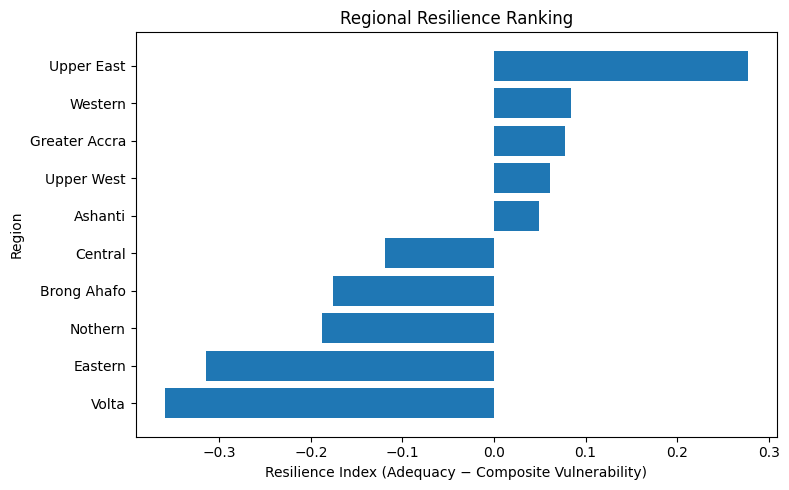

In [13]:
# Bar chart: Resilience Index ranking
plt.figure(figsize=(8, 5))
order = league.sort_values("Resilience Index", ascending=True)
plt.barh(order["Region"], order["Resilience Index"]) # default colors
plt.xlabel("Resilience Index (Adequacy − Composite Vulnerability)")
plt.ylabel("Region")
plt.title("Regional Resilience Ranking")
plt.tight_layout()
plt.show()

## Hotspot Detection

In [14]:
# Thresholds
ADEQUACY_THRESHOLD = 0.5
VULN_THRESHOLD = 0.5

df["Hotspot"] = (df["Adequacy_norm"] < ADEQUACY_THRESHOLD) & (df["Composite Vulnerability Index"] > VULN_THRESHOLD)
df["Hotspot_flag"] = np.where(df["Hotspot"], "CRITICAL", "—")

df[["Region","Adequacy_norm","Composite Vulnerability Index","Hotspot_flag"]]


,Region,Adequacy_norm,Composite Vulnerability Index,Hotspot_flag
0,Ashanti,0.3577,0.3085,—
1,Brong Ahafo,0.2121,0.3876,—
2,Central,0.0324,0.1516,—
3,Eastern,0.0000,0.3149,—
4,Greater Accra,0.2092,0.1319,—
5,Nothern,0.6756,0.8634,—
6,Upper East,0.9297,0.6526,—
7,Upper West,1.0000,0.9388,—
8,Volta,0.0853,0.4447,—
9,Western,0.3370,0.2532,—


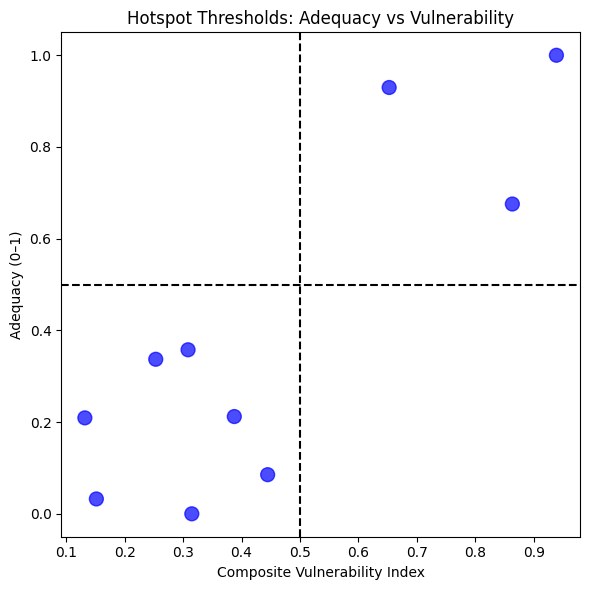

In [15]:
# Scatter with thresholds
plt.figure(figsize=(6,6))
plt.scatter(df["Composite Vulnerability Index"], df["Adequacy_norm"], 
            c=df["Hotspot"].map({True:"red",False:"blue"}), s=100, alpha=0.7)
plt.axvline(VULN_THRESHOLD, linestyle='--', color="black")
plt.axhline(ADEQUACY_THRESHOLD, linestyle='--', color="black")
plt.xlabel("Composite Vulnerability Index")
plt.ylabel("Adequacy (0–1)")
plt.title("Hotspot Thresholds: Adequacy vs Vulnerability")
plt.tight_layout()
plt.show()

## Nutrient vs Vulnerability Correlations

In [16]:
nutrients = ["VitaminC","Zinc","VitaminB6","VitaminB12","VitaminA",
             "Thiamin","Riboflavin","Proteins","Niacin","Kcal","Iron","Follate","Calcium"]

vuln_cols = ["Composite Vulnerability Index","Drought index","Health System Vulnerability Index",
             "Per Capita Food Consumption Index","Vulnerability to Climate Change Index"]

corr = df[nutrients + vuln_cols].corr(method="pearson")

# Nutrient ↔ Vulnerability block
corr_nv = corr.loc[nutrients, vuln_cols]
display(corr_nv.style.background_gradient(cmap="coolwarm", axis=None))


,Composite Vulnerability Index,Drought index,Health System Vulnerability Index,Per Capita Food Consumption Index,Vulnerability to Climate Change Index
VitaminC,-0.806021,-0.587671,-0.385638,0.812417,-0.586981
Zinc,-0.469568,-0.406660,-0.185538,0.272180,-0.404911
VitaminB6,-0.678518,-0.384810,-0.311927,0.692971,-0.382751
VitaminB12,-0.873914,-0.659603,-0.437509,0.895305,-0.659454
VitaminA,-0.918815,-0.770770,-0.517715,0.855263,-0.769791
Thiamin,0.764939,0.755832,0.647624,-0.801094,0.756893
Riboflavin,-0.918074,-0.846872,-0.559061,0.808663,-0.845525
Proteins,-0.833162,-0.657129,-0.412763,0.789959,-0.655829
Niacin,-0.647461,-0.483285,-0.141416,0.608643,-0.482964
Kcal,0.110341,0.250242,0.445653,-0.169431,0.252028


### Sorted Correlations (Insight Ready)

In [17]:
corr_long = (
    corr_nv.reset_index()
    .melt(id_vars="index", var_name="Vulnerability_Index", value_name="Pearson_r")
    .rename(columns={"index": "Nutrient"})
    .assign(abs_r=lambda d: d["Pearson_r"].abs())
    .sort_values("abs_r", ascending=False)
    .reset_index(drop=True)
)

corr_long.head(15)  # top correlations


,Nutrient,Vulnerability_Index,Pearson_r,abs_r
0,Calcium,Composite Vulnerability Index,-0.933806,0.933806
1,VitaminA,Composite Vulnerability Index,-0.918815,0.918815
2,Riboflavin,Composite Vulnerability Index,-0.918074,0.918074
3,VitaminB12,Per Capita Food Consumption Index,0.895305,0.895305
4,VitaminB12,Composite Vulnerability Index,-0.873914,0.873914
5,Calcium,Per Capita Food Consumption Index,0.862101,0.862101
6,VitaminA,Per Capita Food Consumption Index,0.855263,0.855263
7,Riboflavin,Drought index,-0.846872,0.846872
8,Riboflavin,Vulnerability to Climate Change Index,-0.845525,0.845525
9,Proteins,Composite Vulnerability Index,-0.833162,0.833162


## scatter with trend line for any nutrient × vulnerability pair

In [19]:
# scatter with trend line for any nutrient × vulnerability pair
import seaborn as sns

def plot_nutrient_vs_vulnerability(df, nutrient_col, vulnerability_col="Composite Vulnerability Index"):
    """
    Create scatterplot of nutrient vs. vulnerability with regression trendline.
    
    Args:
        df: DataFrame
        nutrient_col: str, nutrient column name (e.g., 'VitaminC', 'Proteins')
        vulnerability_col: str, default = 'Composite Vulnerability Index'
    """
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df,
        x=nutrient_col,
        y=vulnerability_col,
        scatter_kws={"s": 60, "alpha": 0.7},
        line_kws={"color": "red", "lw": 2}
    )
    plt.title(f"{nutrient_col} vs. {vulnerability_col}", fontsize=14)
    plt.xlabel(nutrient_col, fontsize=12)
    plt.ylabel(vulnerability_col, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()


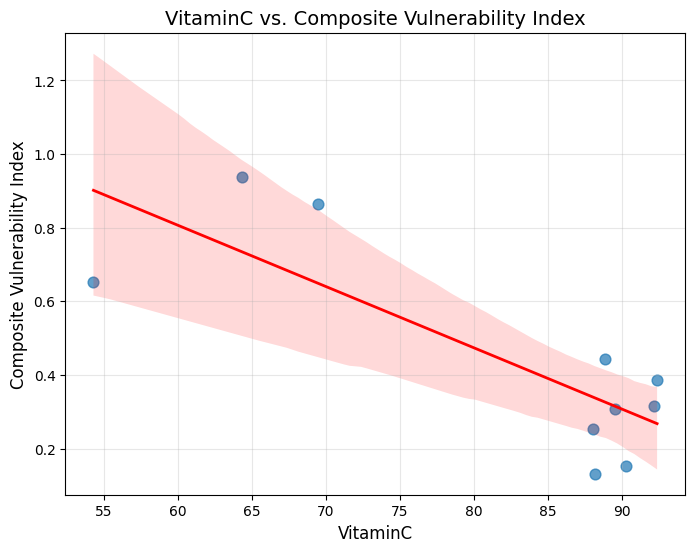

In [20]:
# Example
plot_nutrient_vs_vulnerability(df, "VitaminC")

# Static choropleth with GeoPandas

GeoDataFrame loaded; columns: ['region', 'capital', 'geometry']
Warning — the following geo regions had NO matching data rows (check spelling or keys):


,region
2,North East
3,Savannah
4,Northern
5,Oti
6,Bono East
7,Bono
8,Western North
9,Ahafo


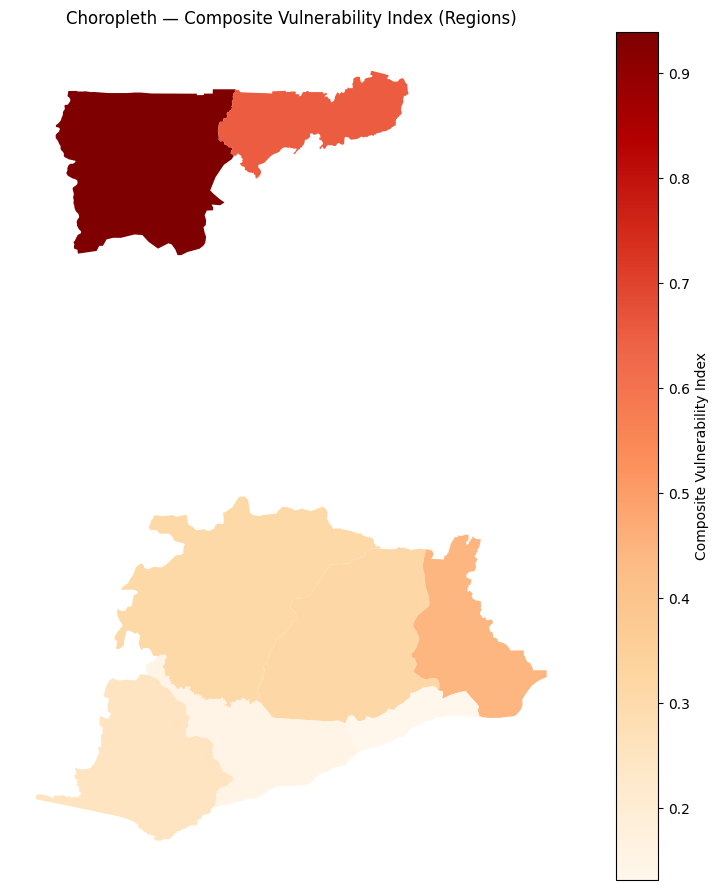

In [21]:
GEOJSON_PATH = "Ghana_regions.json"
COMPOSITE_VULN_COL = "Composite Vulnerability Index"

# Load geojson
gdf = gpd.read_file(GEOJSON_PATH)
print("GeoDataFrame loaded; columns:", list(gdf.columns))

# Attempt to detect the region name column in geojson
candidate_cols = ["Region","NAME_1","NAME","name","Name","region"]
geo_region_col = next((c for c in candidate_cols if c in gdf.columns), None)
if geo_region_col is None:
    # print first rows to help you identify the name column
    print("Couldn't auto-detect region name column. Here's the first few rows of gdf.head():")
    display(gdf.head())
    raise SystemExit("Please set `geo_region_col` to the name column in the GeoJSON and re-run.")

# Normalize keys both sides for robust join
gdf["__key"] = gdf[geo_region_col].astype(str).str.strip().str.upper()
df["__key"] = df["Region"].astype(str).str.strip().str.upper()

# Merge geo + data
gdfm = gdf.merge(df[[ "__key", "Region", COMPOSITE_VULN_COL, "Adequacy_norm", "Resilience Index"]],
                 on="__key", how="left", validate="1:m")

# Report unmatched regions (if any)
missing = gdfm[gdfm[COMPOSITE_VULN_COL].isna()]
if not missing.empty:
    print("Warning — the following geo regions had NO matching data rows (check spelling or keys):")
    display(missing[[geo_region_col]].drop_duplicates())

# Plot
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
gdfm.plot(column=COMPOSITE_VULN_COL, ax=ax, legend=True, cmap="OrRd",
          legend_kwds={"label": "Composite Vulnerability Index", "orientation": "vertical"})
ax.set_title("Choropleth — Composite Vulnerability Index (Regions)")
ax.set_axis_off()

# Add simple labels (optional): comment out if labels overlap
# for idx, row in gdfm.iterrows():
#     if row['geometry'] is not None and row['geometry'].centroid.is_valid:
#         xy = row['geometry'].centroid.coords[0]
#         ax.text(xy[0], xy[1], row['Region'], fontsize=7, ha='center')

plt.tight_layout()
plt.show()

# Interactive Choropleth using Folium

In [30]:
# Interactive Choropleth using Folium (saves ./ghana_choropleth.html)
GEOJSON_PATH = "Ghana_regions.json"
OUT_HTML = "ghana_choropleth.html"
COMPOSITE_VULN_COL = "Composite Vulnerability Index"

# Load geojson as dict (folium wants geojson-like dict)
with open(GEOJSON_PATH, "r", encoding="utf-8") as f:
    gj = json.load(f)

# Build a map centered on Ghana (approximate lat/lon)
m = folium.Map(location=[7.9465, -1.0232], zoom_start=6, tiles="CartoDB positron")

# Prepare data mapping by key - we will add a normalized join key to the GeoJSON features
# Find the property name in GeoJSON features that holds the region name
feat_props = gj["features"][0]["properties"]
print("Sample feature properties:", list(feat_props.keys()))

# property names
candidate_props = ["Region","NAME_1","NAME","name","Name","region"]
prop_name = next((p for p in candidate_props if p in feat_props), None)
if prop_name is None:
    # fallback: try to infer any string property
    for k,v in feat_props.items():
        if isinstance(v, str):
            prop_name = k
            break

if prop_name is None:
    raise SystemExit("Could not find a string property for region names in the geojson.")

print("Using geojson property for region name:", prop_name)

# Build a mapping from geojson property normalized -> feature
for f in gj["features"]:
    key = str(f["properties"].get(prop_name, "")).strip().upper()
    f["properties"]["__key"] = key

# Build a DataFrame keyed by normalized region name for easy lookup
df_map = df.copy()
df_map["__key"] = df_map["Region"].astype(str).str.strip().str.upper()
lookup = df_map.set_index("__key")[[COMPOSITE_VULN_COL, "Adequacy_norm", "Resilience Index", "Region"]].to_dict(orient="index")

# Attach popup/tooltip info to each GeoJSON feature
for f in gj["features"]:
    k = f["properties"]["__key"]
    d = lookup.get(k, None)
    if d:
        f["properties"].update({
            "Region_display": d["Region"],
            COMPOSITE_VULN_COL: float(d[COMPOSITE_VULN_COL]),
            "Adequacy_norm": float(d["Adequacy_norm"]),
            "Resilience Index": float(d["Resilience Index"])
        })
    else:
        # Put NaNs so choropleth won't crash
        f["properties"].update({
            "Region_display": f["properties"].get(prop_name, ""),
            COMPOSITE_VULN_COL: None,
            "Adequacy_norm": None,
            "Resilience Index": None
        })

# Add choropleth
folium.Choropleth(
    geo_data=gj,
    name="choropleth",
    data=df_map,
    columns=["__key", COMPOSITE_VULN_COL],
    key_on="feature.properties.__key",
    fill_color="YlOrRd",
    nan_fill_color="lightgray",
    legend_name="Composite Vulnerability Index",
    highlight=True,
    reset=True
).add_to(m)

# Add tooltip (hover) showing region and key values
tooltip = GeoJsonTooltip(
    fields=["Region_display", COMPOSITE_VULN_COL, "Adequacy_norm", "Resilience Index"],
    aliases=["Region:", "Composite Vulnerability:", "Adequacy (0-1):", "Resilience Index:"],
    localize=True,
    sticky=False,
    labels=True,
    style=("background-color: white; color: #333333;")
)

folium.GeoJson(gj, tooltip=tooltip, name="Regions (hover)").add_to(m)

folium.LayerControl().add_to(m)

# Save and display in notebook
m.save(OUT_HTML)
print("Saved interactive map to", OUT_HTML)
IFrame(OUT_HTML, width="100%", height=600)


Sample feature properties: ['region', 'capital']
Using geojson property for region name: region
Saved interactive map to ghana_choropleth.html


# Scenario Simulation – What-If Drought +10% or Proteins −5%

In [22]:
# Copying base data
df_scenario = df.copy()

In [23]:
# Applying shocks
df_scenario["Drought index (shock +10%)"] = df_scenario["Drought index"] * 1.10
df_scenario["Proteins (shock -5%)"] = df_scenario["Proteins"] * 0.95

In [24]:
# Recompute Composite
vulnerability_cols = [
    "Drought index",
    "Health System Vulnerability Index",
    "Mean Nutrient Adequacy Ratio Index",
    "Per Capita Food Consumption Index",
    "Vulnerability to Climate Change Index"
]

In [25]:
df_scenario["Composite (baseline)"] = df_scenario[vulnerability_cols].mean(axis=1)
df_scenario["Composite (Drought +10%)"] = df_scenario.assign(
    **{"Drought index": df_scenario["Drought index (shock +10%)"]}
)[vulnerability_cols].mean(axis=1)
df_scenario["Composite (Proteins -5%)"] = df_scenario.assign(
    **{"Proteins": df_scenario["Proteins (shock -5%)"]}
)[vulnerability_cols].mean(axis=1)

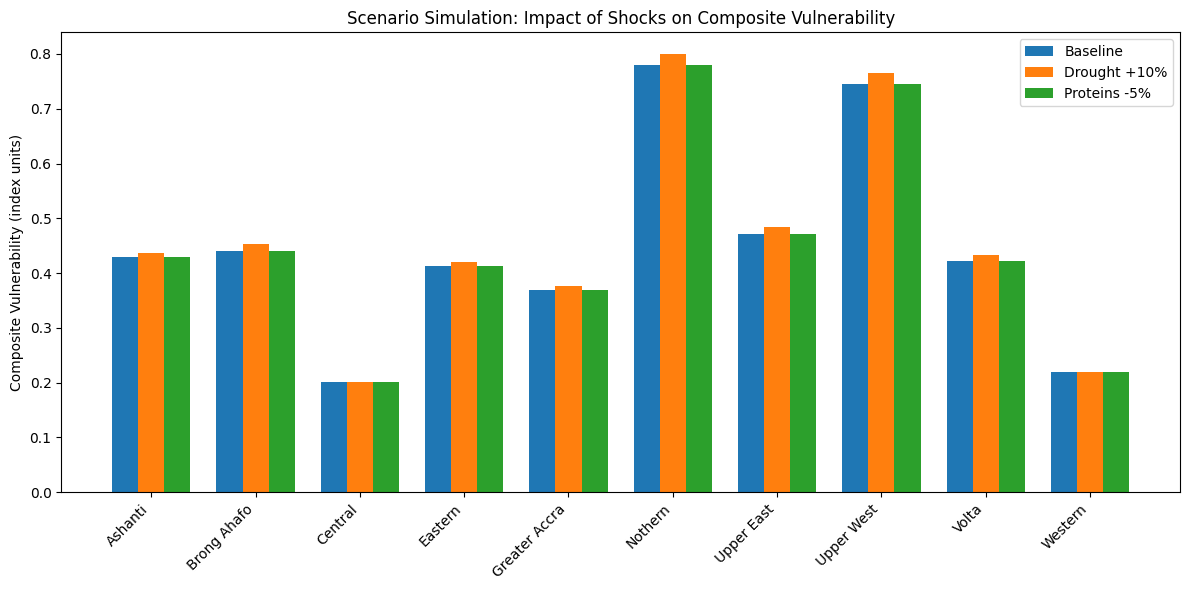

In [26]:
# Plotting
fig, ax = plt.subplots(figsize=(12,6))
width = 0.25
x = range(len(df_scenario))

ax.bar([i - width for i in x], df_scenario["Composite (baseline)"], width, label="Baseline")
ax.bar(x, df_scenario["Composite (Drought +10%)"], width, label="Drought +10%")
ax.bar([i + width for i in x], df_scenario["Composite (Proteins -5%)"], width, label="Proteins -5%")

ax.set_xticks(x)
ax.set_xticklabels(df_scenario["Region"], rotation=45, ha="right")
ax.set_ylabel("Composite Vulnerability (index units)")
ax.set_title("Scenario Simulation: Impact of Shocks on Composite Vulnerability")
ax.legend()

plt.tight_layout()
plt.show()

In [27]:

df_scenario[
    ["Region", "Composite (baseline)", "Composite (Drought +10%)", "Composite (Proteins -5%)"]
]

,Region,Composite (baseline),Composite (Drought +10%),Composite (Proteins -5%)
0,Ashanti,0.42940,0.43760,0.42940
1,Brong Ahafo,0.44074,0.45334,0.44074
2,Central,0.20076,0.20136,0.20076
3,Eastern,0.41216,0.42096,0.41216
4,Greater Accra,0.36950,0.37590,0.36950
5,Nothern,0.77952,0.79952,0.77952
6,Upper East,0.47228,0.48408,0.47228
7,Upper West,0.74502,0.76442,0.74502
8,Volta,0.42146,0.43326,0.42146
9,Western,0.22034,0.22034,0.22034
